# TOP

In [1]:
# Import Required Libraries

In [2]:
# Data formatting
import numpy as np 
import pandas as pd 

# Ploating
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Modeling Machine Learnig 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score

# Cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Modeling Deep Learning
import tensorflow as tf
from keras.layers.convolutional import Conv1D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import models, layers
from tensorflow.keras.utils import plot_model


## Reading the data

In [3]:
df = pd.read_csv('/content/SQLiV3.csv') # Read the dataset.
df.head()

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN


## Data Cleaning

In [4]:
df.shape

(30919, 4)

In [5]:
del df['Unnamed: 2']

del df['Unnamed: 3']

In [6]:
df.head()

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [7]:
df.shape

(30919, 2)

### Count NaN label values.

In [8]:
df['Label'].isna().sum() 


255

### Check the target label values - Manually 

### Remove labels that does not containes correct values (0 or 1)

In [9]:
df = df.drop(df[(df['Label'] != '0') & (df['Label'] != '1')].index) 

In [10]:
df.shape

(30609, 2)

### Check data distrbution

In [11]:
# Count how much label are 1.
df[df['Label'] == '1'].count() 

Sentence    11341
Label       11341
dtype: int64

In [12]:
# Count how much label are 0.
df[df['Label'] == '0'].count() 

Sentence    19268
Label       19268
dtype: int64

## Splitting Data

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
X = df['Sentence']
y = df['Label']

vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# split data into training, validation, and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)
print("X_train = ")
print(X_train.shape)

print("y_train = ")
print(y_train.shape)

print("X_validation = ")
print(X_val.shape)

print("y_validation = ")
print(y_val.shape)

print("X_test = ")
print(X_test.shape)

print("y_test = ")
print(y_test.shape)

X_train = 
(18365, 6509)
y_train = 
(18365,)
X_validation = 
(6122, 6509)
y_validation = 
(6122,)
X_test = 
(6122, 6509)
y_test = 
(6122,)


## Machine Learning Modeling

### Support Vector Machine (SVM)

In [15]:
# %%time
# # create a Support Vector Machines classifier
# classifier = SVC()

# # fit the classifier to the training data
# classifier.fit(X_train, y_train)

# # make predictions on the testing data
# y_pred = classifier.predict(X_test)
# print(f"Accuracy of SVM machine learning algorithm : {accuracy_score(y_pred, y_test)}")

In [16]:
%%time
# Training
# create a Support Vector Machines classifier
classifier = SVC()

# perform 5-fold cross-validation on the training set
scores = cross_val_score(classifier, X_train, y_train, cv=5)

# print the cross-validation scores for each fold
print("Cross-validation scores:", scores)

# fit the model on the training set and evaluate on the validation set
classifier.fit(X_train, y_train)

Cross-validation scores: [0.93874217 0.94037571 0.93574735 0.93683637 0.94064797]
CPU times: user 57min 19s, sys: 10.8 s, total: 57min 30s
Wall time: 57min 27s


SVC()

In [17]:
%%time
# Predication 
# fit the model on the training set and evaluate on the validation set
val_accuracy = classifier.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

# evaluate the model on the test set
test_accuracy = classifier.score(X_test, y_test)
print(f"Accuracy of Support Vector Machine learning algorithm: " + "{:.3f}".format(test_accuracy))

Validation Accuracy: 0.9356419470761189
Accuracy of Support Vector Machine learning algorithm: 0.940
CPU times: user 8min 14s, sys: 594 ms, total: 8min 14s
Wall time: 8min 14s


Confusion Matrix:
[[3778   50]
 [ 319 1975]]


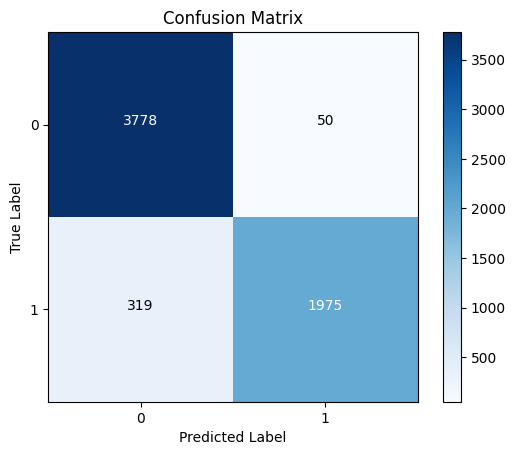

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.95      3828
     Class 1       0.98      0.86      0.91      2294

    accuracy                           0.94      6122
   macro avg       0.95      0.92      0.93      6122
weighted avg       0.94      0.94      0.94      6122



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained a logistic regression classifier named 'classifier' and have your test set (X_test, y_test)

# Predict labels using the trained classifier
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix with annotations
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Add text annotations for TP, TN, FP, FN
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

# Print classification report
target_names = ['Class 0', 'Class 1']  # Replace with your class names if different
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:")
print(classification_rep)


### Naive Bayes

In [19]:
# %%time
# # create a Naive Bayes classifier
# classifier = GaussianNB()

# # fit the classifier to the training data
# classifier.fit(X_train, y_train)

# # make predictions on the testing data
# y_pred = classifier.predict(X_test)
# print(f"Accuracy of Naive Bayes machine learning algorithm : {accuracy_score(y_pred, y_test)}")

In [20]:
%%time
# Training
# create a Naive Bayes classifier
classifier = GaussianNB()

# perform 5-fold cross-validation on the training set
scores = cross_val_score(classifier, X_train, y_train, cv=5)

# print the cross-validation scores for each fold
print("Cross-validation scores:", scores)

# fit the model on the training set and evaluate on the validation set
classifier.fit(X_train, y_train)
val_accuracy = classifier.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")


Cross-validation scores: [0.79961884 0.80098013 0.79635176 0.7998911  0.79635176]
Validation Accuracy: 0.8030055537406077
CPU times: user 9.82 s, sys: 5.47 s, total: 15.3 s
Wall time: 15.3 s


In [21]:
%%time
# Predication 
# evaluate the model on the test set
test_accuracy = classifier.score(X_test, y_test)
print(f"Accuracy of Naive Bayes machine learning algorithm: " + "{:.3f}".format(test_accuracy))

Accuracy of Naive Bayes machine learning algorithm: 0.792
CPU times: user 383 ms, sys: 242 ms, total: 625 ms
Wall time: 631 ms


Confusion Matrix:
[[2583 1245]
 [  26 2268]]


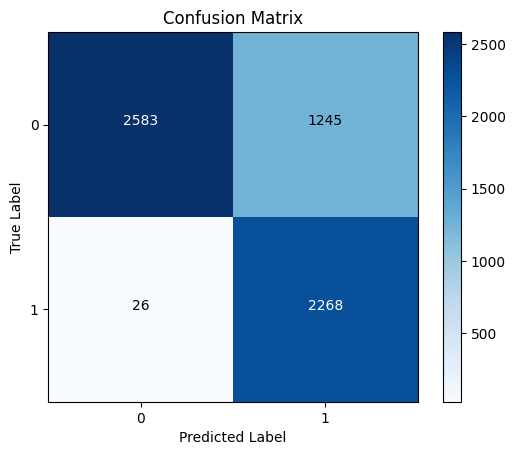

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.67      0.80      3828
     Class 1       0.65      0.99      0.78      2294

    accuracy                           0.79      6122
   macro avg       0.82      0.83      0.79      6122
weighted avg       0.86      0.79      0.79      6122



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained a logistic regression classifier named 'classifier' and have your test set (X_test, y_test)

# Predict labels using the trained classifier
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix with annotations
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Add text annotations for TP, TN, FP, FN
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

# Print classification report
target_names = ['Class 0', 'Class 1']  # Replace with your class names if different
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:")
print(classification_rep)


### Logistic Regression

In [23]:
# %%time
# # create a Logistic Regression classifier
# classifier = LogisticRegression()

# # fit the classifier to the training data
# classifier.fit(X_train, y_train)
        
# # make predictions on the testing data
# y_pred = classifier.predict(X_test)
# print(f"Accuracy of Logistic Regression machine learning algorithm : {accuracy_score(y_pred, y_test)}")


In [24]:
%%time
# Training
# create a logistic regression model
classifier = LogisticRegression()

# perform 5-fold cross-validation on the training set
scores = cross_val_score(classifier, X_train, y_train, cv=5)

# print the cross-validation scores for each fold
print("Cross-validation scores:", scores)

# fit the model on the training set and evaluate on the validation set
classifier.fit(X_train, y_train)
val_accuracy = classifier.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")



Cross-validation scores: [0.932208   0.93765314 0.93166349 0.93710863 0.93928669]
Validation Accuracy: 0.9313949689643907
CPU times: user 2min 1s, sys: 7.08 s, total: 2min 8s
Wall time: 1min 14s


In [25]:
%%time
# Predication 
# evaluate the model on the test set
test_accuracy = classifier.score(X_test, y_test)
print(f"Accuracy of Logistic Regression machine learning algorithm: " + "{:.3f}".format(test_accuracy))

Accuracy of Logistic Regression machine learning algorithm: 0.936
CPU times: user 135 ms, sys: 146 ms, total: 281 ms
Wall time: 165 ms


Confusion Matrix:
[[3786   42]
 [ 352 1942]]


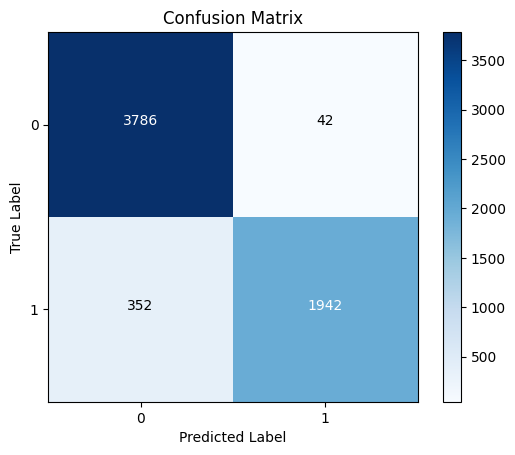

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      0.99      0.95      3828
     Class 1       0.98      0.85      0.91      2294

    accuracy                           0.94      6122
   macro avg       0.95      0.92      0.93      6122
weighted avg       0.94      0.94      0.93      6122



In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained a logistic regression classifier named 'classifier' and have your test set (X_test, y_test)

# Predict labels using the trained classifier
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix with annotations
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Add text annotations for TP, TN, FP, FN
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

# Print classification report
target_names = ['Class 0', 'Class 1']  # Replace with your class names if different
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:")
print(classification_rep)


### Random Forest Classifier


In [27]:
# %%time
# # create a Random Forest classifier with 100 trees
# classifier = RandomForestClassifier(n_estimators=100)

# # fit the classifier to the training data
# classifier.fit(X_train, y_train)

# # make predictions on the testing data
# y_pred = classifier.predict(X_test)

# # calculate the accuracy of the classifier
# print(f"Accuracy of Random Forest machine learning algorithm : {accuracy_score(y_pred, y_test)}")

In [28]:
%%time
# Training
# create a Random Forest classifier with 100 trees
classifier = RandomForestClassifier(n_estimators=100)

# perform 5-fold cross-validation on the training set
scores = cross_val_score(classifier, X_train, y_train, cv=5)

# print the cross-validation scores for each fold
print("Cross-validation scores:", scores)

# fit the model on the training set and evaluate on the validation set
classifier.fit(X_train, y_train)
val_accuracy = classifier.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")


Cross-validation scores: [0.91396678 0.92485707 0.92158998 0.92594609 0.93002995]
Validation Accuracy: 0.9232277033649134
CPU times: user 11min 31s, sys: 2.21 s, total: 11min 33s
Wall time: 11min 32s


In [29]:
%%time
# Predication 
# evaluate the model on the test set
test_accuracy = classifier.score(X_test, y_test)
print(f"Accuracy of Logistic Regression machine learning algorithm: " + "{:.3f}".format(test_accuracy))

Accuracy of Logistic Regression machine learning algorithm: 0.929
CPU times: user 1.94 s, sys: 33 ms, total: 1.97 s
Wall time: 1.97 s


Confusion Matrix:
[[3648  180]
 [ 257 2037]]


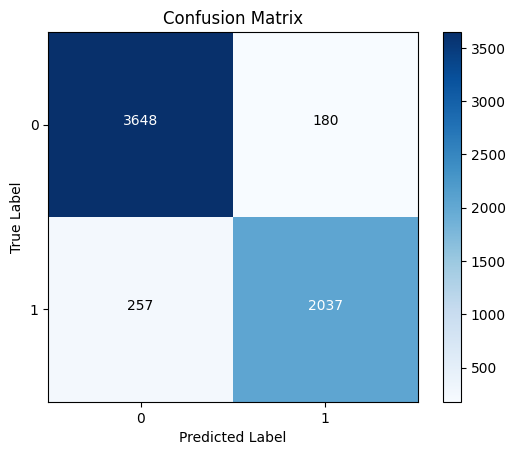

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.95      0.94      3828
     Class 1       0.92      0.89      0.90      2294

    accuracy                           0.93      6122
   macro avg       0.93      0.92      0.92      6122
weighted avg       0.93      0.93      0.93      6122



In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained a logistic regression classifier named 'classifier' and have your test set (X_test, y_test)

# Predict labels using the trained classifier
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix with annotations
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Add text annotations for TP, TN, FP, FN
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

# Print classification report
target_names = ['Class 0', 'Class 1']  # Replace with your class names if different
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:")
print(classification_rep)


### Decision Tree Classifier


In [31]:
# %%time
# # create a Decision Tree classifier
# classifier = DecisionTreeClassifier()

# # fit the classifier to the training data
# classifier.fit(X_train, y_train)

# # make predictions on the testing data
# y_pred = classifier.predict(X_test)

# # calculate the accuracy of the classifier
# print(f"Accuracy of Decision Tree machine learning algorithm : {accuracy_score(y_pred, y_test)}")

In [32]:
%%time
# Training
# create a Decision Tree classifier
classifier = DecisionTreeClassifier()

# perform 5-fold cross-validation on the training set
scores = cross_val_score(classifier, X_train, y_train, cv=5)

# print the cross-validation scores for each fold
print("Cross-validation scores:", scores)

# fit the model on the training set and evaluate on the validation set
classifier.fit(X_train, y_train)
val_accuracy = classifier.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")


Cross-validation scores: [0.9049823  0.90824939 0.90525456 0.91478356 0.92104547]
Validation Accuracy: 0.9121202221496243
CPU times: user 6min 26s, sys: 1.87 s, total: 6min 28s
Wall time: 6min 28s


In [33]:
%%time
# Predication
# evaluate the model on the test set
test_accuracy = classifier.score(X_test, y_test)
print(f"Accuracy of Logistic Regression machine learning algorithm: " + "{:.3f}".format(test_accuracy))

Accuracy of Logistic Regression machine learning algorithm: 0.916
CPU times: user 101 ms, sys: 30 ms, total: 131 ms
Wall time: 131 ms


Confusion Matrix:
[[3562  266]
 [ 249 2045]]


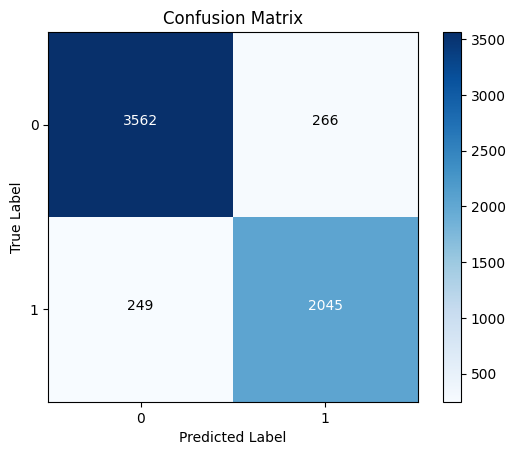

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.93      0.93      3828
     Class 1       0.88      0.89      0.89      2294

    accuracy                           0.92      6122
   macro avg       0.91      0.91      0.91      6122
weighted avg       0.92      0.92      0.92      6122



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained a logistic regression classifier named 'classifier' and have your test set (X_test, y_test)

# Predict labels using the trained classifier
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix with annotations
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Add text annotations for TP, TN, FP, FN
thresh = cm.max() / 2.0
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

# Print classification report
target_names = ['Class 0', 'Class 1']  # Replace with your class names if different
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:")
print(classification_rep)


## Deep Learning

### CNN

In [35]:
X = df['Sentence']
y = df['Label']
print(X.shape, y.shape)

(30609,) (30609,)


#### Splitting Data

In [36]:
import nltk
nltk.download('stopwords')
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

# Split the data into training, validation, and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(18365, 6509)
(18365,)
(6122, 6509)
(6122,)
(6122, 6509)
(6122,)


In [37]:
# Fix data type errror in CNN algorithem
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

#### Build CNN Model

In [ ]:
%%time
# Training
model = models.Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation = 'relu', input_shape = (1,6509)))
model.add(Conv1D(filters=32, kernel_size=1, activation = 'relu'))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.summary()
model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

X_train1 = X_train.reshape(-1, 1, 6509)
X_val1 = X_val.reshape(-1, 1, 6509)
X_test1 = X_test.reshape(-1, 1, 6509)

# history = model.fit(X_train1, y_train, epochs = 100, validation_data = (X_test1, y_test))
history = model.fit(X_train1, y_train, validation_data=(X_val1, y_val), epochs=100, batch_size=128)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             416640    
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             2080      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 418,753
Trainable params: 418,753
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
144/144 [==============================] - 8s 40ms/step - loss: 0.3075 - accuracy: 0.9186 - val_loss: 0.1403 - val_accuracy: 0.9427
Epoch 2/100
144/144 [=================

In [ ]:
%%time
# Predication
y_pred = model.predict(X_test1).flatten()
y_pred = np.round(y_pred)
print(f"Accuracy of CNN on test set : {accuracy_score(y_pred, y_test)}")

192/192 [==============================] - 1s 3ms/step
Accuracy of CNN on test set : 0.957203528258739
CPU times: user 995 ms, sys: 598 ms, total: 1.59 s
Wall time: 1.45 s


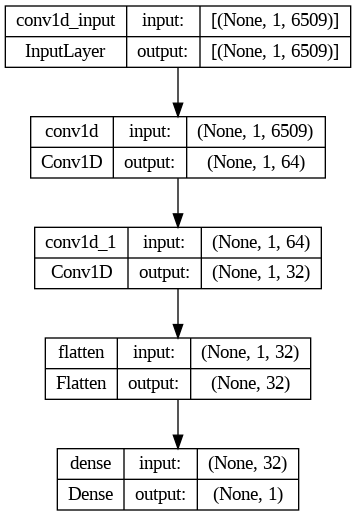

In [ ]:
plot_model(model, show_shapes=True, to_file='CNN.png')

<ipython-input-41-12d874e91428>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss,'b', color="orange", label='Validation error')


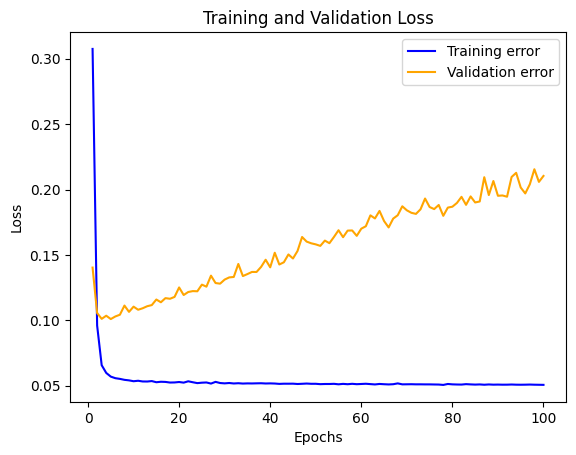

In [ ]:
# Plots loss for each epochs
history_dict = history.history
# Training loss for each epochs
train_loss = history_dict['loss'] 
# Validation loss for each epochs
val_loss = history_dict['val_loss']    

epochs = range(1, len(history_dict['loss'])+1)

# Plotting 
plt.plot(epochs, train_loss,'b', label='Training error')
plt.plot(epochs, val_loss,'b', color="orange", label='Validation error')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<ipython-input-42-1d2dfc03b524>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc,'b', color="orange", label='Validation accuracy')


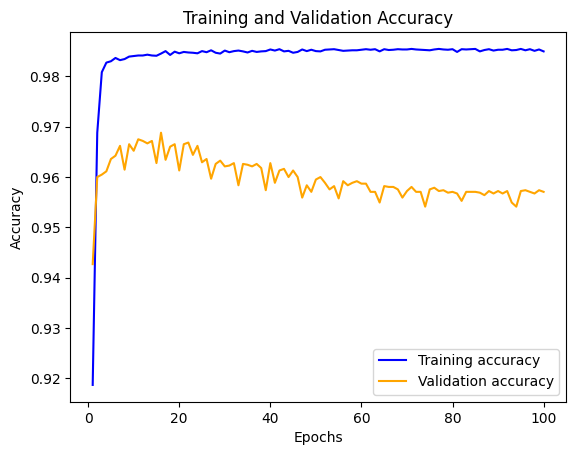

In [ ]:
# Plots accuracy for each epochs
history_dict = history.history
# Training accuracy for each epochs
train_acc = history_dict['accuracy']    
# Validation accuracy for each epochs
val_acc = history_dict['val_accuracy']    
epochs = range(1, len(history_dict['accuracy'])+1)
plt.plot(epochs, train_acc,'b', label='Training accuracy')
plt.plot(epochs, val_acc,'b', color="orange", label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

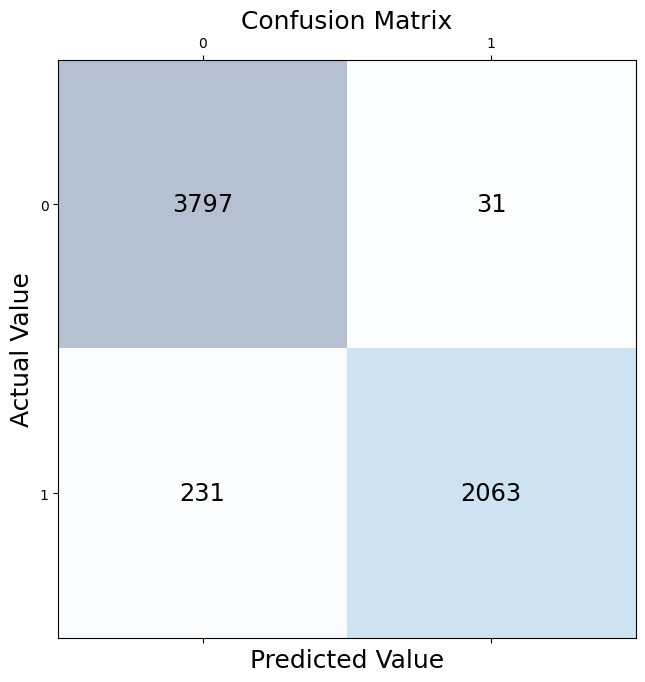

               precision    recall  f1-score   support

Non-Intrusion       0.94      0.99      0.97      3828
    Intrusion       0.99      0.90      0.94      2294

     accuracy                           0.96      6122
    macro avg       0.96      0.95      0.95      6122
 weighted avg       0.96      0.96      0.96      6122



In [ ]:
# Plots confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predicted Value', fontsize=18)
plt.ylabel('Actual Value', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Plots classification report
print(classification_report(y_test, y_pred, target_names=["Non-Intrusion", "Intrusion"]))

## Transfer Learning

### BERT

In [ ]:
! pip install -q tf-models-official
# ! pip install -q tensorflow-text
!pip install --upgrade tensorflow-hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 22.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 35.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
# import tensorflow_addons as tfa
from sklearn.metrics import f1_score

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
df["Label"] = pd.to_numeric(df["Label"])

df = df.sample(frac = 1).reset_index(drop = True)
df.rename(columns = {'Sentence' : 'X', 'Label' : 'y'}, inplace = True)

slice_index_1 = int(0.6*len(df))
slice_index_2 = int(0.8*len(df))
train_df = df.iloc[:slice_index_1, :]
val_df = df.iloc[slice_index_1:slice_index_2, :]
test_df = df.iloc[slice_index_2:,:]

X_train = train_df
y_train = X_train.pop('y').to_frame()

X_val = val_df
y_val = X_val.pop('y').to_frame()

X_test = test_df
y_test = X_test.pop('y').to_frame()

train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))
val_ds = tf.data.Dataset.from_tensor_slices((X_val,y_val))
test_ds = tf.data.Dataset.from_tensor_slices((X_test,y_test))

print(train_ds)
print(len(list(train_ds)))
print(val_ds)
print(len(list(val_ds)))
print(test_ds)
print(len(list(test_ds)))

<_TensorSliceDataset element_spec=(TensorSpec(shape=(1,), dtype=tf.string, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>
18365
<_TensorSliceDataset element_spec=(TensorSpec(shape=(1,), dtype=tf.string, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>
6122
<_TensorSliceDataset element_spec=(TensorSpec(shape=(1,), dtype=tf.string, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>
6122


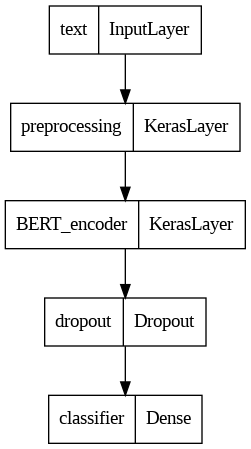

In [ ]:
#Build classifier model
text_input = tf.keras.layers.Input(shape = (),dtype = tf.string, name = 'text')
preprocessing_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", name = 'preprocessing')
encoder_inputs = preprocessing_layer(text_input)
encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True, name = 'BERT_encoder')
outputs = encoder(encoder_inputs)
net = outputs['pooled_output']
net = tf.keras.layers.Dropout(0.1)(net)
net = tf.keras.layers.Dense(1, activation = None, name = 'classifier')(net)
classifier_model =  tf.keras.Model(text_input, net)

tf.keras.utils.plot_model(classifier_model)

In [ ]:
%%time
# Training
loss = tf.keras.losses.BinaryCrossentropy(from_logits = True)
metrics = tf.metrics.BinaryAccuracy()

epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1 * num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr = init_lr, num_train_steps = num_train_steps,
                                         num_warmup_steps = num_warmup_steps, optimizer_type = 'adamw')

classifier_model.compile(optimizer = optimizer, loss = loss, metrics = metrics)

history = classifier_model.fit(x = train_ds, validation_data = val_ds, epochs = epochs)


Epoch 1/5
 4652/18365 [======>.......................] - ETA: 11:46:26 - loss: 0.1011 - binary_accuracy: 0.9637

In [ ]:
%%time
# Predication
score = classifier_model.evaluate(test_ds)

y_pred = classifier_model.predict(test_ds)

for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

print("")
print(f"Accuracy of BERT on test set : {score[1]}")
# print(f"F1 Score of BERT on test set : {f1_score(y_test, y_pred)}")